<a href="https://colab.research.google.com/github/blancavazquez/7ta_escuela_invierno/blob/main/notebook/ML_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Modelos de aprendizaje de máquinas y su interpretación para la toma decisiones

Objetivo: Interpretar la salida de un modelo de aprendizaje de máquinas

1. Analizar un conjunto de datos de enfermedades cardiacas.
2. Construir un modelo de clasificación para predecir la presencia de una enfermedad cardiaca.
3. Interpretar la salida del modelo usando teoría de juegos.

In [ ]:
#Carga de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carga de datos
path = "/content/drive/MyDrive/Colab Notebooks/2024_Escuela_Invierno/heart.csv"
data = pd.read_csv(path)

## 1. Análisis exploratorio de los datos

In [ ]:
#Visualizando los datos completos
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   57    0   0       140   241    0        1      123      1      0.2   
292   45    1   3       110   264    0        1      132      0      1.2   
293   68    1   0       144   193    1        1      141      0      3.4   
294   57    1   0       130   131    0        1      115      1      1.2   
295   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
291      1   0     3       0  
292      1   0     3       0  
293      1   2     3       0  
294      1   1     3       0  
295      1   1     2       0  

[296 rows x 14 columns]

Diccionario de datos
* age: age in years
* sex: sex
1 = male
0 = female
*cp: chest pain type
0 = typical angina
1 =  atypical angina
2 =  non-anginal pain
3 = asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
* restecg: resting electrocardiographic results
0 = normal
1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2= showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
1 = yes
0 = no
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
0 = upsloping
1 = flat
2 = downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
* target (label):
0 = no disease,
1 = disease

In [ ]:
#Renombrando columnas
data = data.rename(columns = {
               'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia',
               'target':'label'}, errors="raise")

In [ ]:
#Visualizando datos con columnas renombradas
data

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
291   57    0                0                     140          241   
292   45    1                3                     110          264   
293   68    1                0                     144          193   
294   57    1                0                     130          131   
295   57    0                1                     130          236   

     fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
0                      1                          0                      150   
1                      0                          1                      187   
2                      0                          0                      172   
3                      0                          1                      178   
4                      0                          1                      163   
..                   ...                        ...                      ...   
291                    0                          1                      123   
292                    0                          1                      132   
293                    1                          1                      141   
294                    0                          1                      115   
295                    0                          0                      174   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                          0            2.3         0                  0   
1                          0            3.5         0                  0   
2                          0            1.4         2                  0   
3                          0            0.8         2                  0   
4                          1            0.6         2                  0   
..                       ...            ...       ...                ...   
291                        1            0.2         1                  0   
292                        0            1.2         1                  0   
293                        0            3.4         1                  2   
294                        1            1.2         1                  1   
295                        0            0.0         1                  1   

     thalassemia  label  
0              1      1  
1              2      1  
2              2      1  
3              2      1  
4              2      1  
..           ...    ...  
291            3      0  
292            3      0  
293            3      0  
294            3      0  
295            2      0  

[296 rows x 14 columns]

<Axes: title={'center': 'Distribución del número de casos por etiqueta'}, xlabel='Etiqueta', ylabel='Número de casos'>

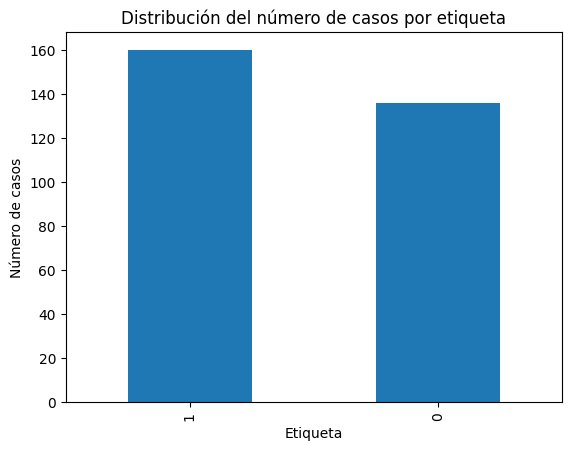

In [ ]:
#Visualizando el número de casos por etiqueta
data['label'].value_counts().plot(kind='bar',xlabel='Etiqueta', ylabel = 'Número de casos', title = 'Distribución del número de casos por etiqueta')

<Axes: xlabel='age', ylabel='Count'>

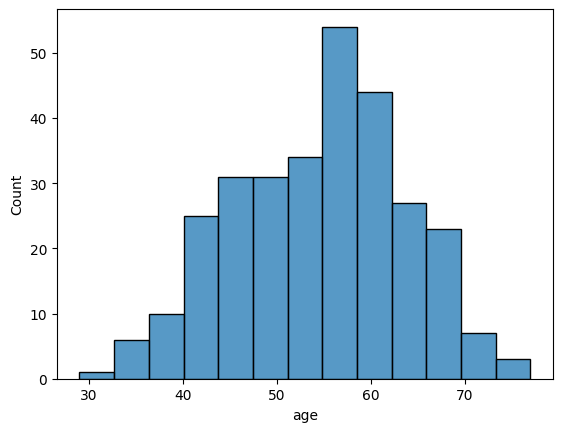

In [ ]:
#Histograma de la edad de los pacientes
sns.histplot(data=data, x="age")

<Axes: xlabel='age', ylabel='Count'>

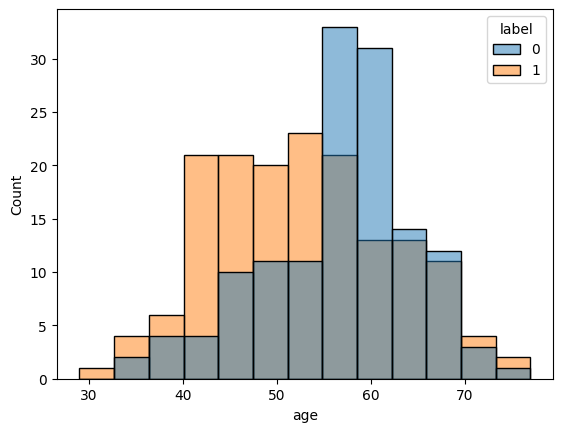

In [ ]:
#Histograma de la edad considerando la etiqueta de los datos
sns.histplot(data=data, x="age", hue="label")

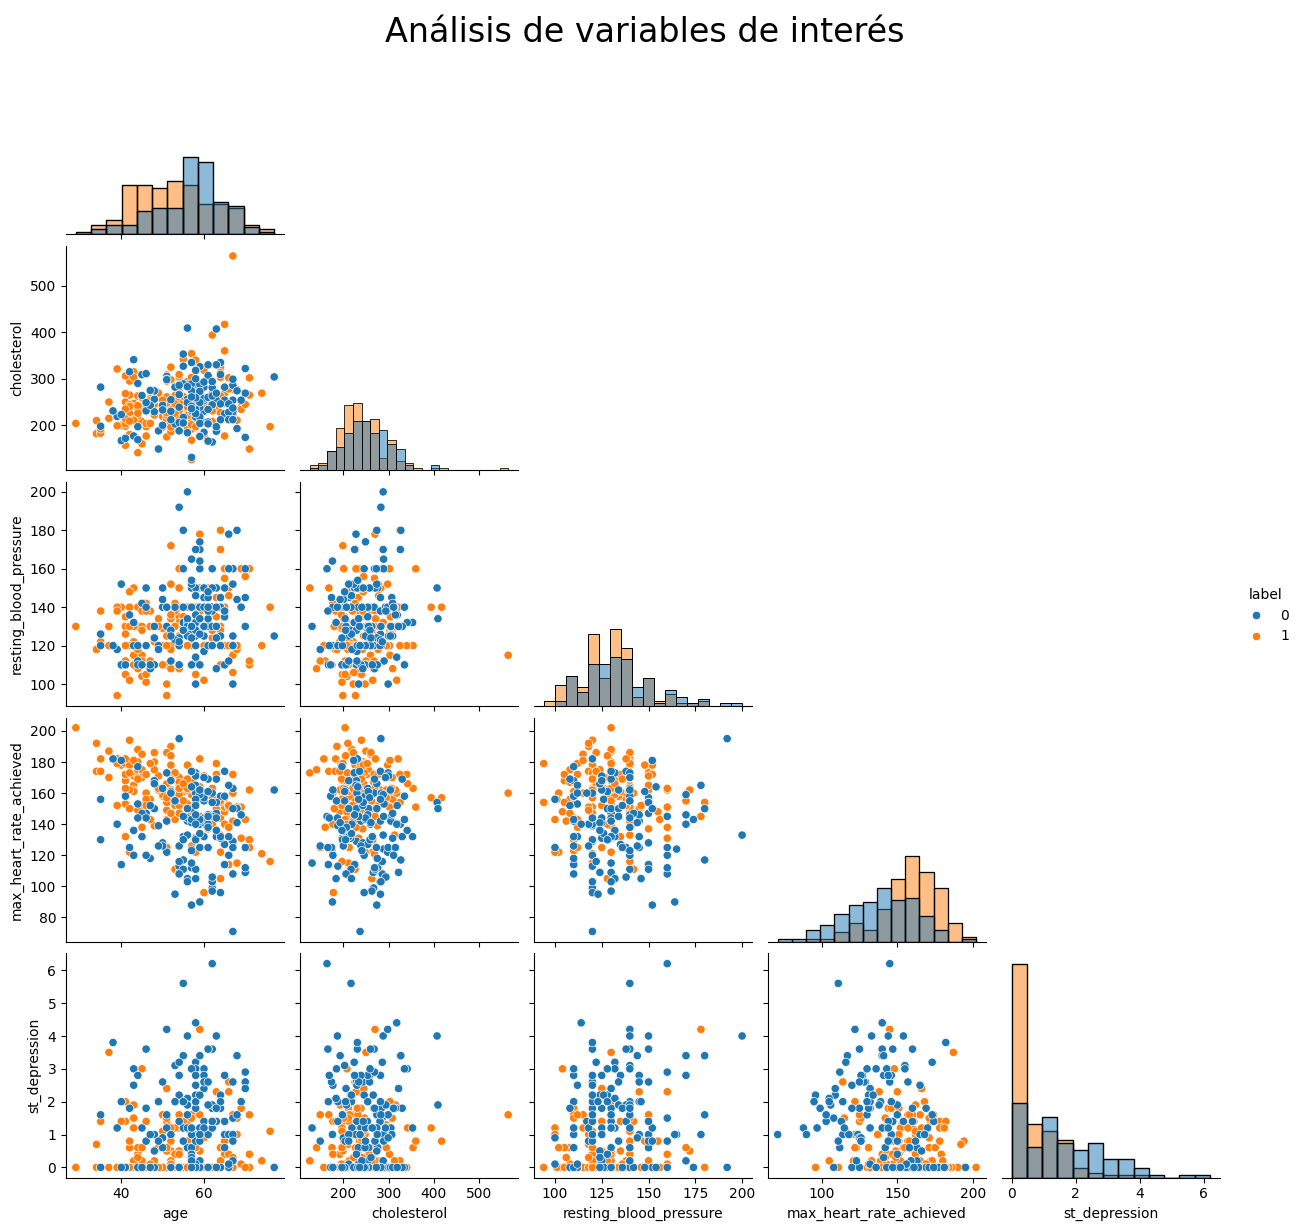

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'label']
data_ = data[_]
g = sns.pairplot(data_, hue="label", corner=True, diag_kind='hist');
plt.suptitle('Análisis de variables de interés' ,fontsize = 24);

In [ ]:
#Revisando el tipo de dato por variable
data.dtypes

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
resting_electrocardiogram      int64
max_heart_rate_achieved        int64
exercise_induced_angina        int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
label                          int64
dtype: object

In [ ]:
data.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  296.000000  296.000000       296.000000               296.00000   
mean    54.523649    0.679054         0.959459               131.60473   
std      9.059471    0.467631         1.034184                17.72662   
min     29.000000    0.000000         0.000000                94.00000   
25%     48.000000    0.000000         0.000000               120.00000   
50%     56.000000    1.000000         1.000000               130.00000   
75%     61.000000    1.000000         2.000000               140.00000   
max     77.000000    1.000000         3.000000               200.00000   

       cholesterol  fasting_blood_sugar  resting_electrocardiogram  \
count   296.000000            296.00000                 296.000000   
mean    247.155405              0.14527                   0.523649   
std      51.977011              0.35297                   0.526692   
min     126.000000              0.00000                   0.000000   
25%     211.000000              0.00000                   0.000000   
50%     242.500000              0.00000                   1.000000   
75%     275.250000              0.00000                   1.000000   
max     564.000000              1.00000                   2.000000   

       max_heart_rate_achieved  exercise_induced_angina  st_depression  \
count               296.000000               296.000000     296.000000   
mean                149.560811                 0.327703       1.059122   
std                  22.970792                 0.470171       1.166474   
min                  71.000000                 0.000000       0.000000   
25%                 133.000000                 0.000000       0.000000   
50%                 152.500000                 0.000000       0.800000   
75%                 166.000000                 1.000000       1.650000   
max                 202.000000                 1.000000       6.200000   

         st_slope  num_major_vessels  thalassemia       label  
count  296.000000         296.000000   296.000000  296.000000  
mean     1.395270           0.679054     2.327703    0.540541  
std      0.618235           0.939726     0.585743    0.499198  
min      0.000000           0.000000     1.000000    0.000000  
25%      1.000000           0.000000     2.000000    0.000000  
50%      1.000000           0.000000     2.000000    1.000000  
75%      2.000000           1.000000     3.000000    1.000000  
max      2.000000           3.000000     3.000000    1.000000

In [ ]:
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

<ipython-input-14-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-14-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-14-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-14-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow

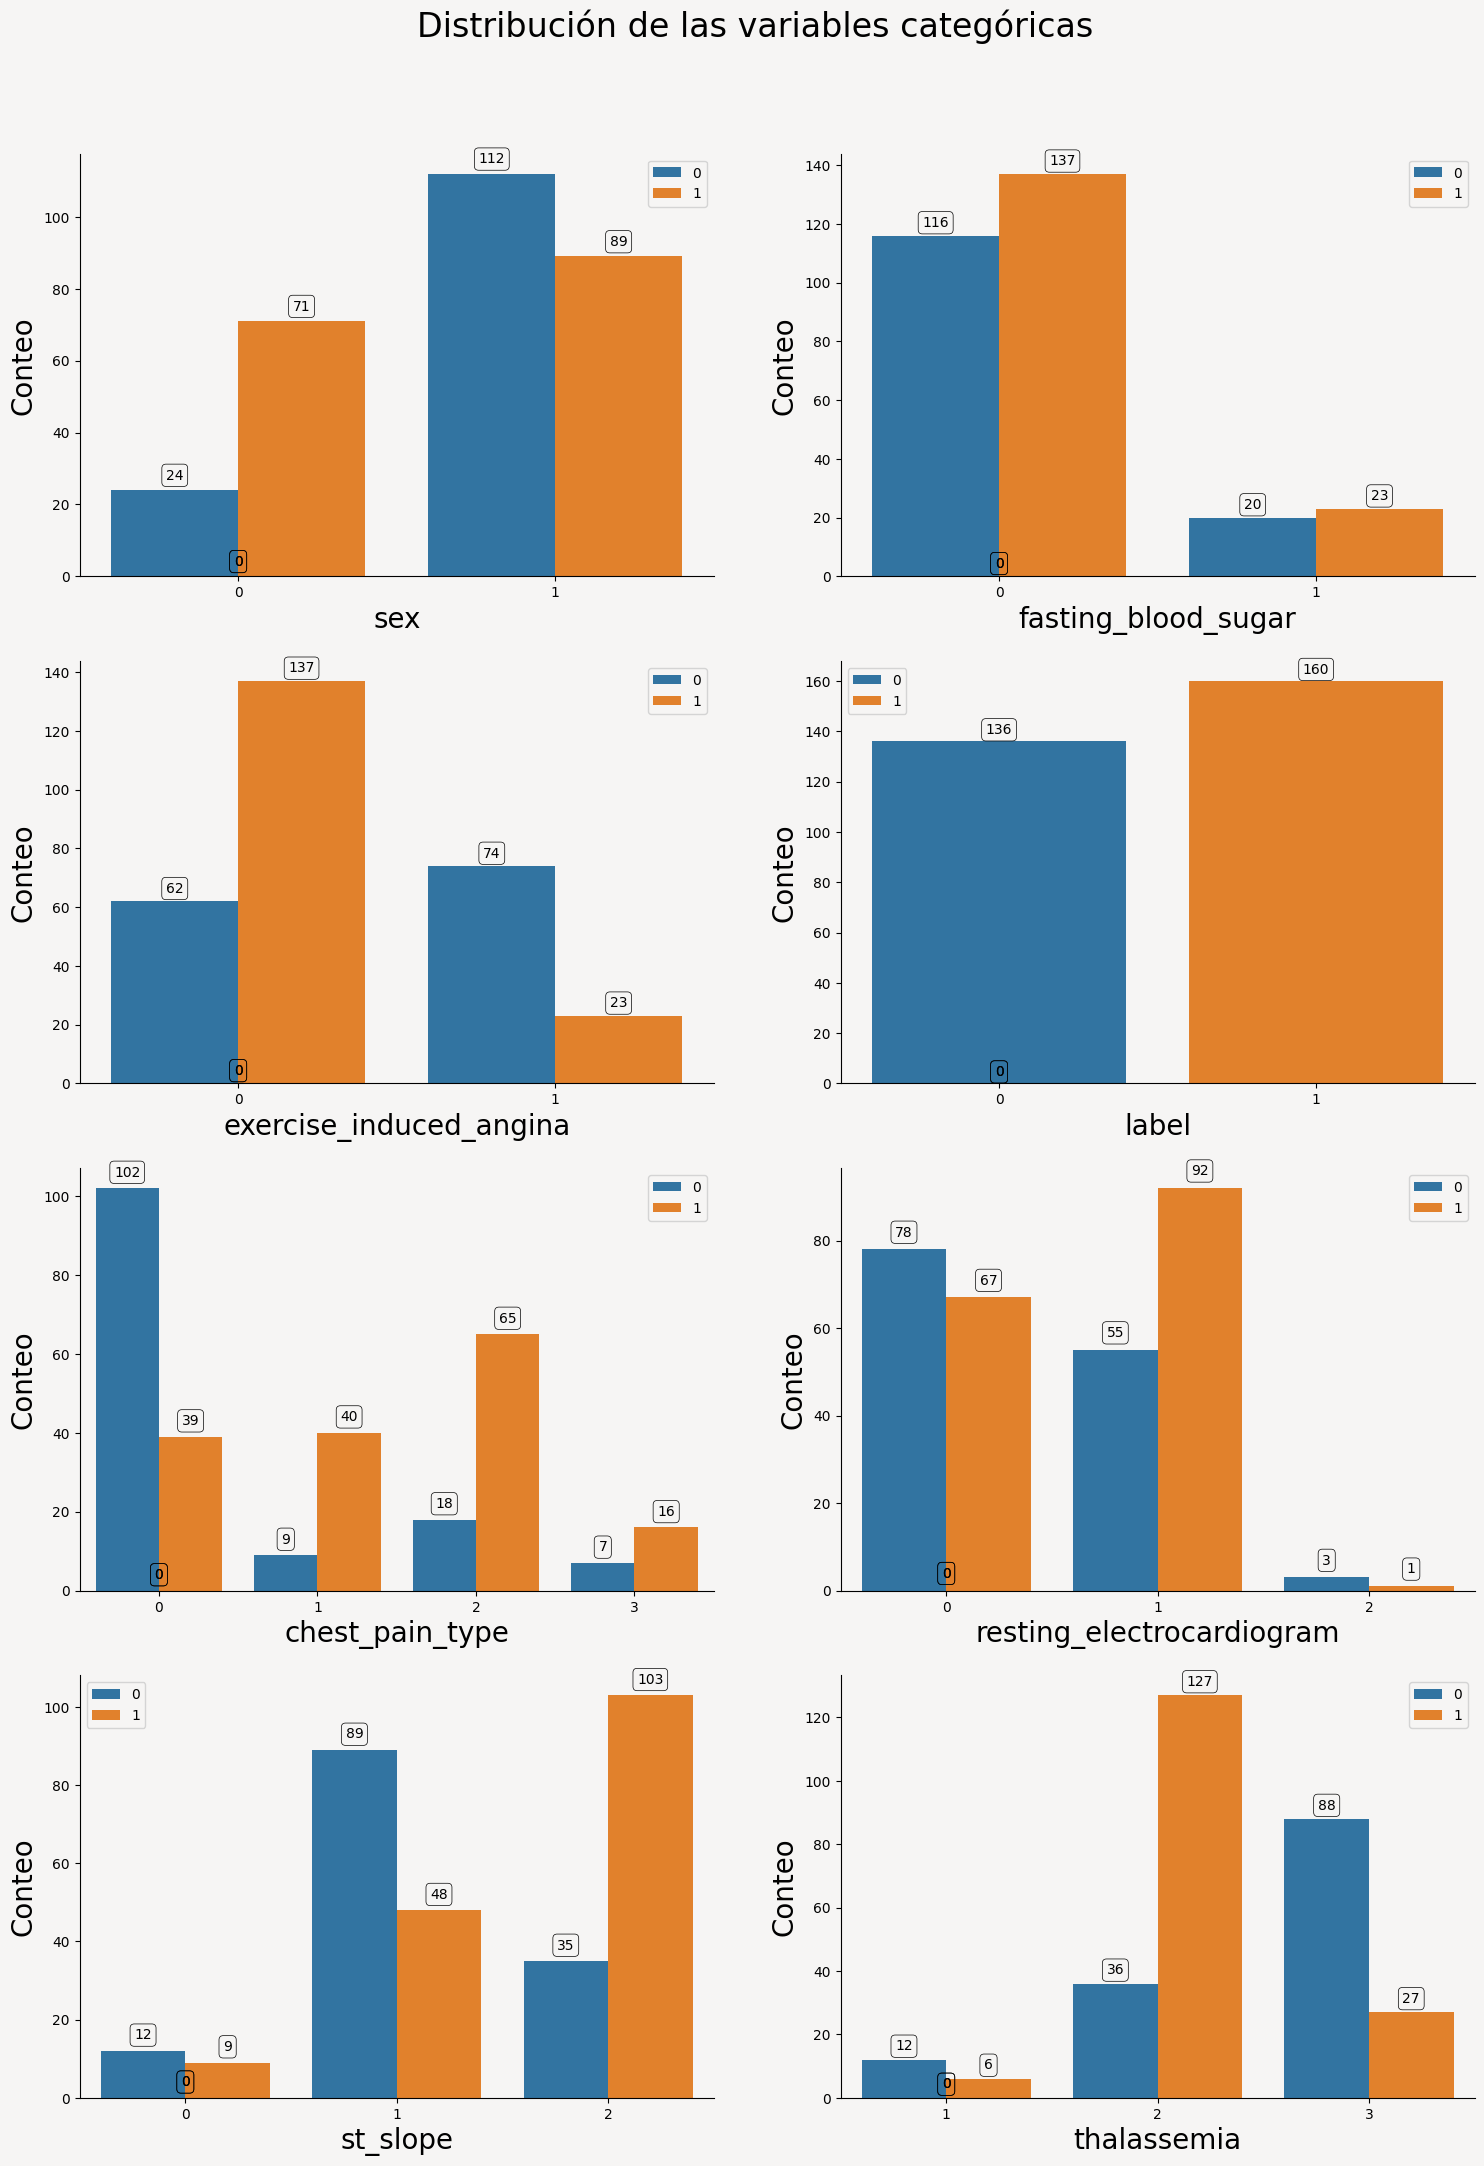

In [ ]:
def count_plot(data):
    cat_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'label', 'chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="label")
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("Conteo", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribución de las variables categóricas' ,fontsize = 24)
    return 0

count_plot(data);

### Mapas de correlación


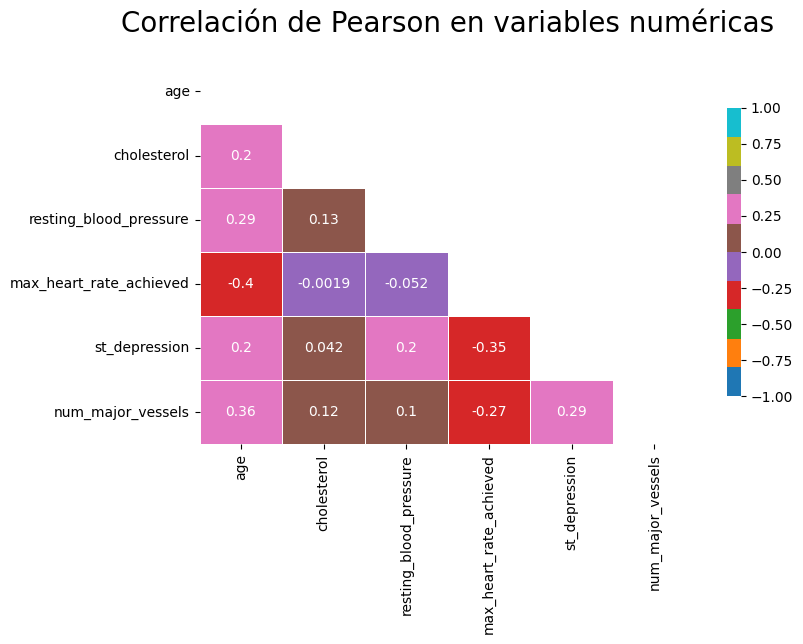

In [ ]:
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Correlación de Pearson en variables numéricas", fontsize=20, y= 1.05);

In [ ]:
#Análisis de datos ausentes
print(" \nContando el número de datos ausentes por variables : \n\n", data.isnull().sum())

 
Contando el número de datos ausentes por variables : 

 age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
label                        0
dtype: int64


### Resumen de las características analizadas

* Edad: el promedio de la edad es de 54.5 años. La edad más joven registrada es de 29 años y la mayor fue de 77 años.
* Colesterol: el promedio es de 247.15. EL nivel máximo fue de 564 y el mínimo de 126. De acuerdo a la literatura clínica, niveles mayores a 200 mg/dl están asociados con enfermedades cardiacas.
* No hay datos ausentes
* La etiqueta está ligeramente balanceada

Source:

* [Heart Disease Predictions](https://www.kaggle.com/code/desalegngeb/heart-disease-predictions)
* [What Causes Heart Disease? Explaining the Model](https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model)
* [Diabetic retinopathy - SHAP model explainability](https://www.kaggle.com/code/dimitreoliveira/diabetic-retinopathy-shap-model-explainability/notebook)


## 2. Preprocesamiento de los datos

In [ ]:
#Codificando datos
features = data.columns[:-1]
X = data[features]
y = data['label']
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder().fit_transform(y)

### Selección de características (feature selection)

In [ ]:
#Selección de características
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Definiendo un modelo de  KNN
knn = KNeighborsClassifier()
#P4: Feature selection
sfs_backward = SFS(knn, k_features=13, scoring='accuracy',forward = True).fit(X, y)
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

feature_idx  \
1                                         (9,)   
2                                       (2, 9)   
3                                    (1, 2, 9)   
4                                (1, 2, 9, 11)   
5                            (1, 2, 9, 11, 12)   
6                         (1, 2, 6, 9, 11, 12)   
7                     (1, 2, 6, 9, 10, 11, 12)   
8                  (1, 2, 5, 6, 9, 10, 11, 12)   
9               (1, 2, 5, 6, 8, 9, 10, 11, 12)   
10           (1, 2, 3, 5, 6, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [0.65, 0.7288135593220338, 0.6949152542372882,...  0.682542   
2   [0.8, 0.7796610169491526, 0.711864406779661, 0...      0.76   
3   [0.75, 0.847457627118644, 0.7457627118644068, ...  0.777119   
4   [0.8, 0.8305084745762712, 0.7796610169491526, ...  0.783729   
5   [0.85, 0.864406779661017, 0.847457627118644, 0...  0.834407   
6   [0.8333333333333334, 0.864406779661017, 0.8983...  0.848023   
7   [0.8833333333333333, 0.847457627118644, 0.8474...  0.837684   
8   [0.8666666666666667, 0.864406779661017, 0.8305...   0.83774   
9   [0.8333333333333334, 0.8813559322033898, 0.864...  0.848023   
10  [0.7833333333333333, 0.8305084745762712, 0.847...  0.793955   
11  [0.6, 0.7457627118644068, 0.7796610169491526, ...  0.699661   
12  [0.6, 0.6440677966101694, 0.6610169491525424, ...  0.652203   
13  [0.6, 0.6949152542372882, 0.6101694915254238, ...  0.658983   

                                        feature_names  ci_bound   std_dev  \
1                                    (st_depression,)   0.04059   0.03158   
2                    (chest_pain_type, st_depression)  0.038617  0.030045   
3               (sex, chest_pain_type, st_depression)  0.047678  0.037095   
4   (sex, chest_pain_type, st_depression, num_majo...  0.037923  0.029505   
5   (sex, chest_pain_type, st_depression, num_majo...  0.032397  0.025206   
6   (sex, chest_pain_type, resting_electrocardiogr...  0.051265  0.039886   
7   (sex, chest_pain_type, resting_electrocardiogr...  0.038747  0.030146   
8   (sex, chest_pain_type, fasting_blood_sugar, re...   0.03324  0.025862   
9   (sex, chest_pain_type, fasting_blood_sugar, re...  0.038589  0.030023   
10  (sex, chest_pain_type, resting_blood_pressure,...  0.050143  0.039013   
11  (age, sex, chest_pain_type, resting_blood_pres...  0.086025   0.06693   
12  (age, sex, chest_pain_type, resting_blood_pres...  0.039703   0.03089   
13  (age, sex, chest_pain_type, resting_blood_pres...  0.058363  0.045409   

     std_err  
1    0.01579  
2   0.015023  
3   0.018548  
4   0.014753  
5   0.012603  
6   0.019943  
7   0.015073  
8   0.012931  
9   0.015012  
10  0.019507  
11  0.033465  
12  0.015445  
13  0.022704

In [ ]:
print('Mejor rendimiento obtenido: %.2f' % sfs_backward.k_score_)
print('Índices de las características seleccionadas:', sfs_backward.k_feature_idx_)
print('Características seleccionadas:', sfs_backward.k_feature_names_)

Mejor rendimiento obtenido: 0.66
Índices de las características seleccionadas: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
Características seleccionadas: ('age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia')


In [ ]:
# Selección de variables para SFS forward
variables=list(sfs_backward.k_feature_names_) #Variables seleccionadas por SFS forward
print("Variables: ", variables)
print("X: ", X.shape, "y:", y.shape)

Variables:  ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X:  (296, 13) y: (296,)


In [ ]:
# Creación del conjunto con las características seleccionadas
X_seleccion = X.loc[:,variables]
names=X.columns
print("X (subset):", X.shape, "names: ", len(names))

X (subset): (296, 13) names:  13


In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba.
#P1: test_size indica la proporción del conjunto de datos para construir el test_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seleccion, y_enc, test_size = 0.20, random_state=242)

#P2. Normalización de datos
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler().fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

In [ ]:
print("X_train: ", X_train.shape, "y_train: ", y_train.shape)
print("X_test: ", X_test.shape, "y_test: ", y_test.shape)

X_train:  (236, 13) y_train:  (236,)
X_test:  (60, 13) y_test:  (60,)


## 3. Construcción de los modelos de clasificación binaria

In [ ]:
#Carga de las bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

### Ajuste fino de hiperparámetros

In [ ]:
def grid(estimador, parameters, xtrain, ytrain):
    #P3: Función que ejecuta validación cruzada
    from sklearn.model_selection import GridSearchCV, KFold
    cv = KFold(n_splits=5, shuffle = True, random_state=422)
    grid = GridSearchCV(estimator=estimador,
                        param_grid=parameters,
                        cv = cv,
                        scoring='accuracy',
                        refit = True).fit(xtrain,ytrain)
    mean_train = grid.cv_results_['mean_test_score'][grid.best_index_]
    std_train = grid.cv_results_['std_test_score'][grid.best_index_]
    print("Best parameters: ", grid.best_params_)
    print('Training: mean = %.3f std = (%.3f)' % (mean_train, std_train))
    return grid

In [ ]:
print("* Training Random forest")
from sklearn.ensemble import RandomForestClassifier
estimador = RandomForestClassifier()
parameters={"n_estimators":[50,100,200],}
model_rf = estimador.fit(X_train, y_train)

* Training Random forest


In [ ]:
print("* Training C-Support Vector Classification")
from sklearn.svm import SVC
estimador = SVC(probability=True)
parameters={"kernel": ['linear','rbf']}
model_svc = estimador.fit(X_train, y_train)

* Training C-Support Vector Classification


In [ ]:
print("* Training KNeighborsClassifier")
from sklearn.neighbors import KNeighborsClassifier
estimador = KNeighborsClassifier()
model_kn = estimador.fit(X_train, y_train)

* Training KNeighborsClassifier


## 4. Análisis del rendimiento de los modelos

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt

def compute_metrics(clf, X_test, y_test):
    #Obtenemos y_predicha
    y_pred = clf.predict(X_test)

    #Se calcula la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred) #exactitud
    f1 = f1_score(y_test, y_pred)
    sensitivity = tp / (tp+fn) # recall
    specificity = tn / (tn+fp)
    precision = tp/(tp+fp)

    print("Accuracy: ", np.round(accuracy,3))
    print("F1: ", np.round(f1,3))
    print("Sensitivity: ", np.round(sensitivity,3))
    print("Specificity: ", np.round(specificity,3))
    print("Precision: ", np.round(precision,3))

    #Se despliega la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

=== Random forest ===
Accuracy:  0.833
F1:  0.828
Sensitivity:  0.889
Specificity:  0.788
Precision:  0.774


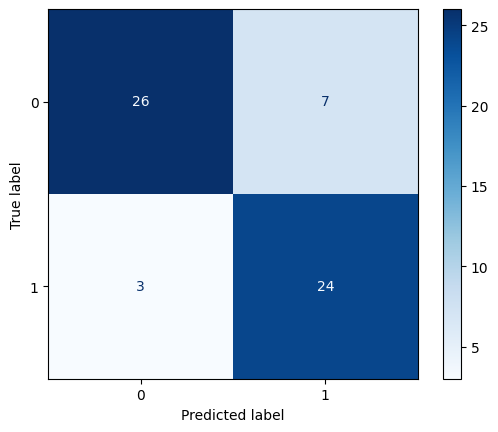

In [ ]:
print("=== Random forest ===")
compute_metrics(model_rf, X_test, y_test)

=== SVC ===
Accuracy:  0.8
F1:  0.786
Sensitivity:  0.815
Specificity:  0.788
Precision:  0.759


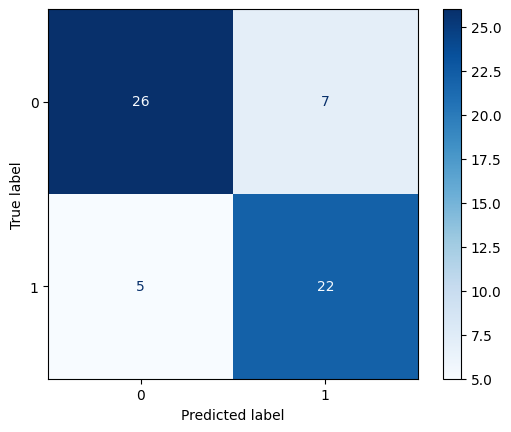

In [ ]:
print("=== SVC ===")
compute_metrics(model_svc, X_test, y_test)

=== K vecinos ===
Accuracy:  0.817
F1:  0.807
Sensitivity:  0.852
Specificity:  0.788
Precision:  0.767


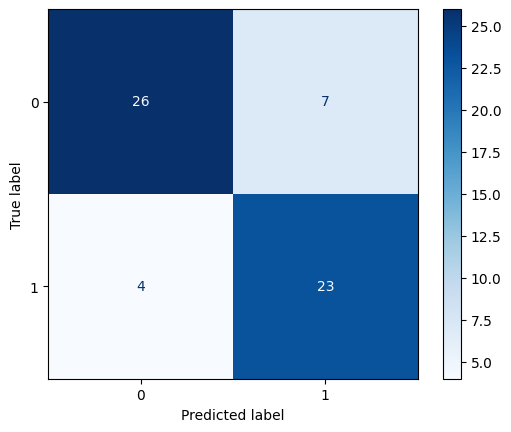

In [ ]:
print("=== K vecinos ===")
compute_metrics(model_kn, X_test, y_test)

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(clf, X_test, y_test):
    y_predicted = clf.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, lw=3, label= ' ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')

=== RF ===


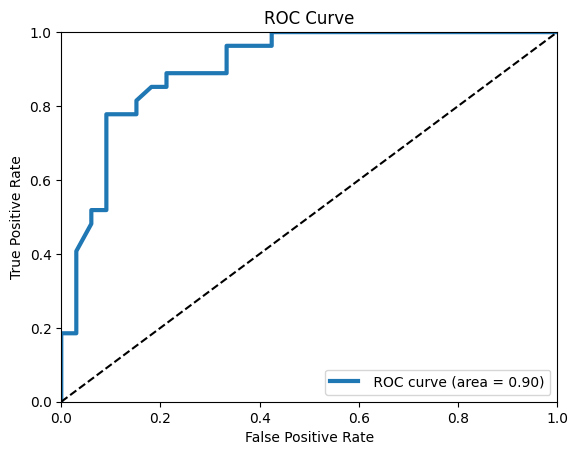

In [ ]:
print("=== RF ===")
plot_roc_curve(model_rf, X_test, y_test)

=== SVM ===


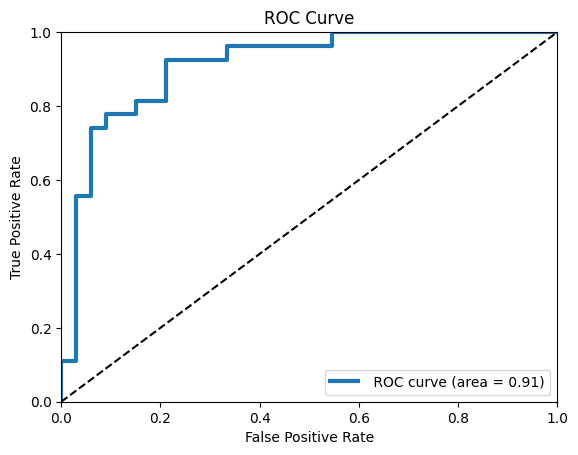

In [ ]:
print("=== SVM ===")
plot_roc_curve(model_svc, X_test, y_test)

=== K vecinos ===


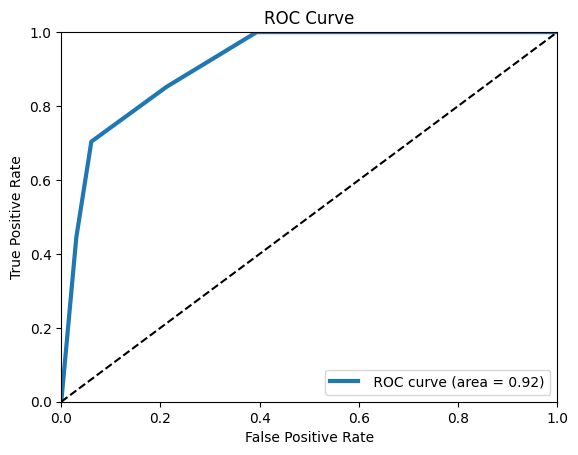

In [ ]:
print("=== K vecinos ===")
plot_roc_curve(model_kn, X_test, y_test)

## 5. Interpretabilidad del modelo

### Shap Values
Se basa en la teoría del juego, donde el juego es la tarea de predicción y los jugadores son los valores de las características.Se puede utilizar en modelos complejos y ha sido empleado para predecir hipoxemia y enfermedad renal.


[Source](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [ ]:
!pip install shap --upgrade
import shap
shap.initjs()

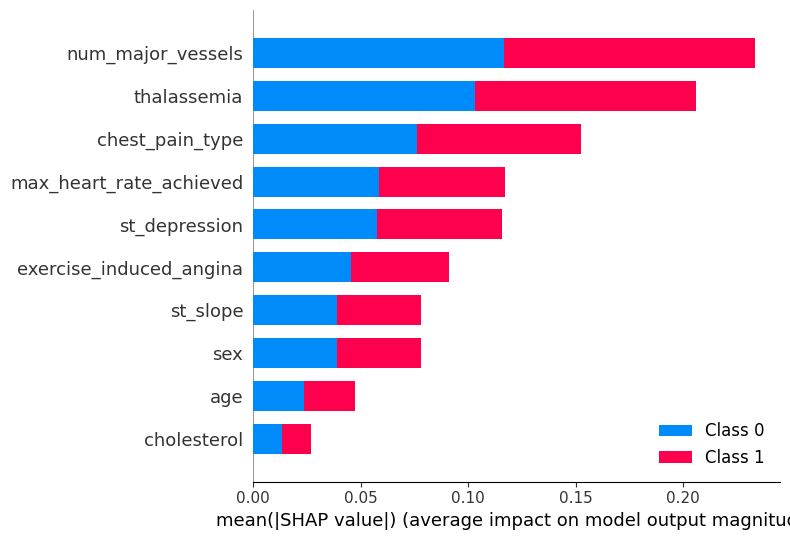

In [ ]:
explainer = shap.TreeExplainer(model_rf) #.best_estimator_
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_seleccion,
                    feature_names=X_seleccion.columns,
                    plot_type="bar",
                    max_display=10)

* Talasemia: Se caracteriza por una cantidad inferior a la normal de las proteínas encargadas de transportar oxígeno (hemoglobina) y de glóbulos rojos.
*

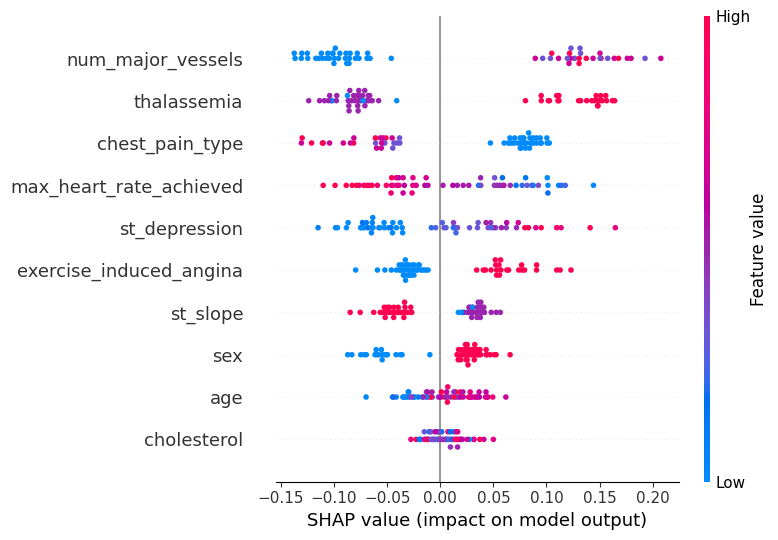

In [ ]:
shap.summary_plot(shap_values[0],X_test,
                  feature_names=X_seleccion.columns,
                  plot_type="dot",
                  max_display=10)

In [ ]:
X.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

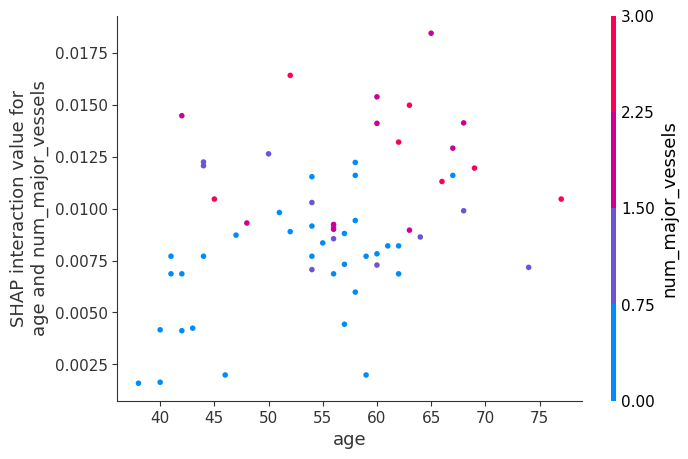

In [65]:
X_test_escaled = escalador.inverse_transform(X_test)
X_test_escaled = pd.DataFrame(X_test_escaled, columns = X.columns)
shap_interaction_values = shap.TreeExplainer(model_rf).shap_interaction_values(X_test_escaled)
feature_list=X_test_escaled.columns.tolist()
shap.dependence_plot((feature_list.index('age'),
                      feature_list.index('num_major_vessels')),
                      shap_interaction_values[1], X_test_escaled)

In [ ]:
pat_sick = data[(data.label==1)]
pat_sick = pat_sick.drop(columns=['label'])

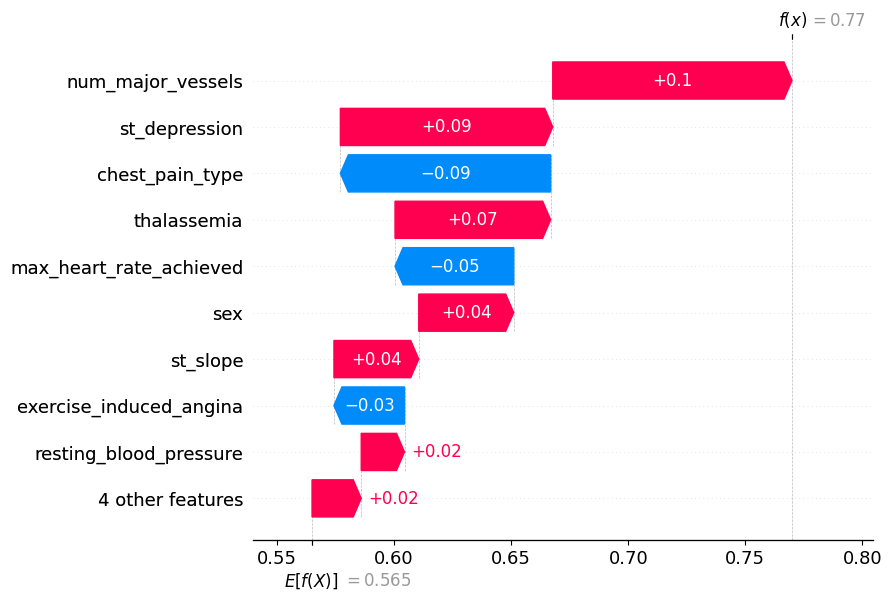

In [ ]:
explainer = shap.TreeExplainer(model_rf) #.best_estimator_
shap_values = explainer(pat_sick)
id_pat = 17
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1],shap_values[id_pat].values[:,0],
                                       feature_names=pat_sick.columns, max_display=10)

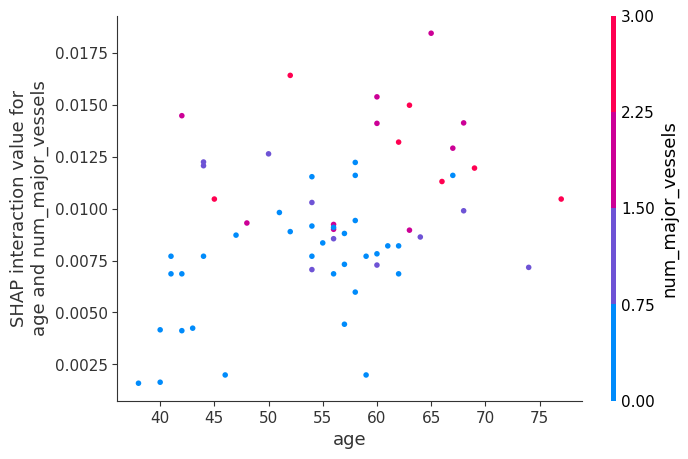

In [67]:
shap_interaction_values = shap.TreeExplainer(model_rf).shap_interaction_values(X_test_escaled)
shap.dependence_plot((feature_list.index('age'),
                      feature_list.index('num_major_vessels')),
                      shap_interaction_values[1], X_test_escaled)

### Importancia de la permutación
La importancia de la permutación se define como la disminución en la puntuación de un modelo cuando el valor de una sola característica se mezcla aleatoriamente. El procedimiento rompe la relación entre la característica y el objetivo, por lo que la caída en la puntuación del modelo es indicativa de cuánto depende el modelo de la característica [3]. En otras palabras, la importancia de la permutación nos dice qué características tienen el mayor impacto en las predicciones de nuestro modelo.

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(model_rf, n_repeats = 5).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_seleccion.columns.tolist())

### Visualizando el árbol de decisiones

In [ ]:
from sklearn.tree import export_graphviz #plot tree

In [ ]:
estimator = model_rf.estimators_[1]

y_str = y.astype('str')
y_str[y_str == '0'] = 'no disease'
y_str[y_str == '1'] = 'disease'
y_str = y_str.values

In [ ]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X_seleccion.columns,
                class_names = y_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

### Feature importance

Las importancias de las características las proporciona el atributo ajustado feature_importances_ y se calculan como la media y la desviación estándar de la acumulación de la disminución de impurezas dentro de cada árbol.

Text(0.5, 1.0, 'Características más importantes')

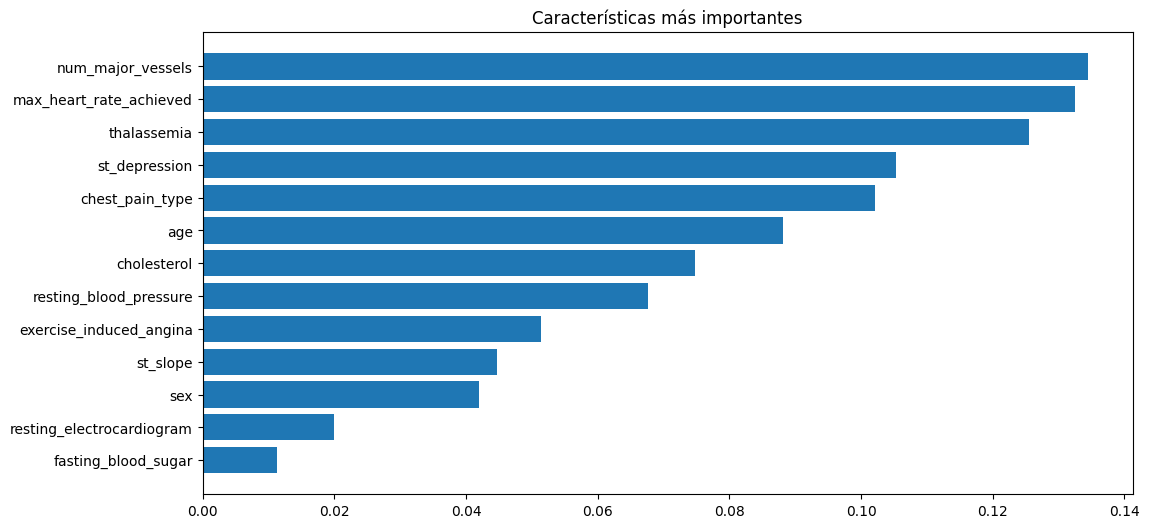

In [63]:
feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_seleccion.columns)[sorted_idx])
plt.title('Características más importantes')

<Axes: >

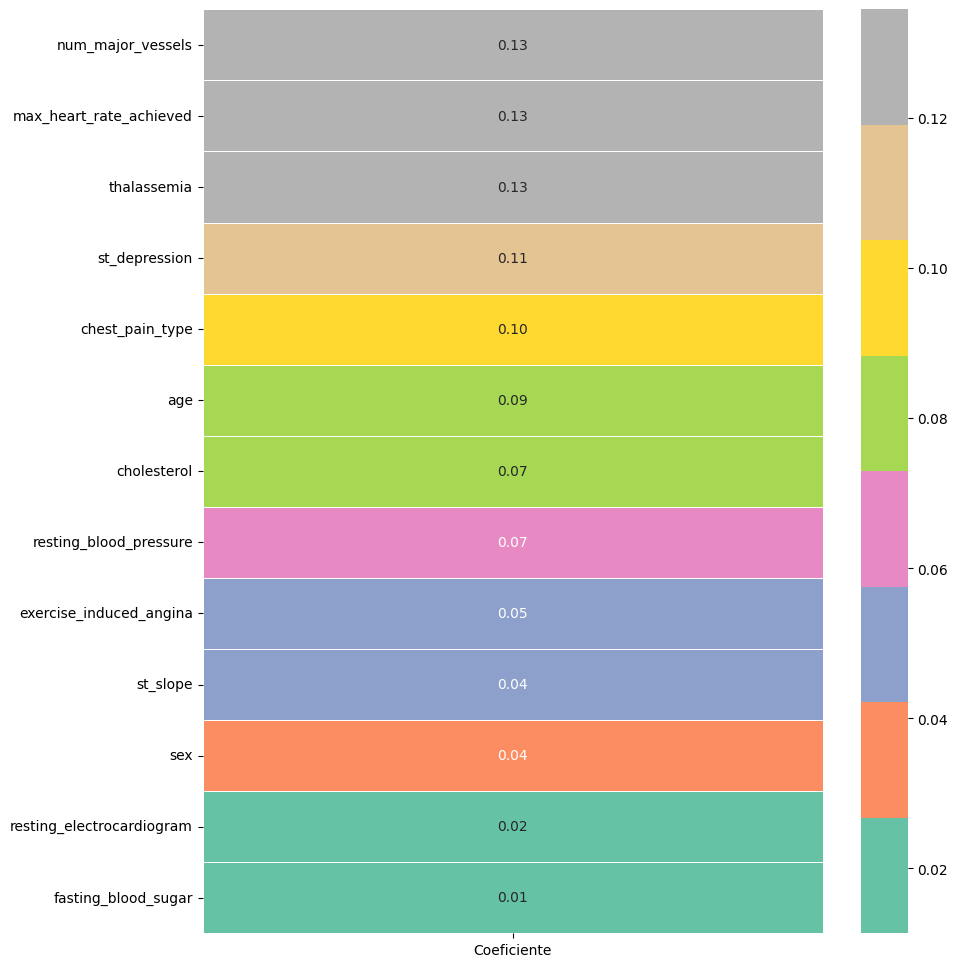

In [79]:
plt.figure(figsize=(10,12))
feature_importance = model_rf.feature_importances_
coeficientes = pd.DataFrame(feature_importance,X.columns)
coeficientes.columns = ['Coeficiente']
coeficientes.sort_values(by=['Coeficiente'],inplace=True,ascending=False)
sns.heatmap(coeficientes,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

En color gris se muestran las variables más importantes: num_major_vessels, max_heart_rate_achieved, thalassemia. Mientras en color verde (al fondo de la tabla) se muestran las variables menos relevantes: resting_electrocardiagram y fasting_blood_sugar

## Sitios de interés

*   [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/)
*   [Documentación de Shap values](https://shap.readthedocs.io/en/latest/index.html)